In [21]:
import random
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import FashionMNIST

In [22]:
device = torch.device('cuda: 0' if torch.cuda.is_available() else 'cpu')

def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    
SEED = 42
set_seed(SEED)

In [23]:
train_dataset = FashionMNIST('./data',
                             train=True,
                             download=True,
                             transform=transforms.ToTensor())
test_dataset = FashionMNIST('./data',
                             train=False,
                             download=True,
                             transform=transforms.ToTensor())

In [24]:

train_ratio = 0.9
train_size = int(len(train_dataset) * train_ratio)
val_size = len(train_dataset) - train_size

train_subset, val_subset = random_split(train_dataset,
                                        [train_size, val_size])
train_loader = DataLoader(train_subset,
                          batch_size=256,
                          shuffle=True)
val_loader = DataLoader(val_subset,
                        batch_size=256,
                        shuffle=False)
test_loader = DataLoader(test_dataset,
                        batch_size=256,
                        shuffle=False)

print(f'Train size: {len(train_subset)}')
print(f'Validation size: {len(val_subset)}')
print(f'Test size: {len(test_dataset)}')

Train size: 54000
Validation size: 6000
Test size: 10000


In [25]:
# # MLP
# class MLP(nn.Module):
#     def __init__(self, input_dims, hidden_dims, output_dims):
#         super(MLP, self).__init__()
#         self.layer1 = nn.Linear(input_dims, hidden_dims)
#         self.layer2 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer3 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer4 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer5 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer6 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer7 = nn.Linear(hidden_dims, hidden_dims)
#         self.output = nn.Linear(hidden_dims, output_dims)
        
#     def forward(self, x):
#         x = nn.Flatten()(x)
#         x = self.layer1(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer2(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer3(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer4(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer5(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer6(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer7(x)
#         x = nn.Sigmoid()(x)
#         out = self.output(x)
        
#         return out
    
# input_dims = 784
# hidden_dims = 128
# output_dims = 10
# lr = 1e-2

# model = MLP(input_dims=input_dims,
#             hidden_dims=hidden_dims,
#             output_dims=output_dims).to(device)

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=lr)

In [26]:
# # Weight Increasing
# class MLP(nn.Module):
#     def __init__(self, input_dims, hidden_dims, output_dims):
#         super(MLP, self).__init__()
#         self.layer1 = nn.Linear(input_dims, hidden_dims)
#         self.layer2 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer3 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer4 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer5 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer6 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer7 = nn.Linear(hidden_dims, hidden_dims)
#         self.output = nn.Linear(hidden_dims, output_dims)
        
#         for module in self.modules():
#             if isinstance(module, nn.Linear):
#                 nn.init.normal_(module.weight, mean=0.0, std=1.0)
#                 nn.init.constant_(module.bias, 0.0)
        
#     def forward(self, x):
#         x = nn.Flatten()(x)
#         x = self.layer1(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer2(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer3(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer4(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer5(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer6(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer7(x)
#         x = nn.Sigmoid()(x)
#         out = self.output(x)
        
#         return out
    
# input_dims = 784
# hidden_dims = 128
# output_dims = 10
# lr = 1e-2

# model = MLP(input_dims=input_dims,
#             hidden_dims=hidden_dims,
#             output_dims=output_dims).to(device)

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=lr)

In [27]:
# # Better Activation
# class MLP(nn.Module):
#     def __init__(self, input_dims, hidden_dims, output_dims):
#         super(MLP, self).__init__()
#         self.layer1 = nn.Linear(input_dims, hidden_dims)
#         self.layer2 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer3 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer4 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer5 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer6 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer7 = nn.Linear(hidden_dims, hidden_dims)
#         self.output = nn.Linear(hidden_dims, output_dims)
        
#         for module in self.modules():
#             if isinstance(module, nn.Linear):
#                 nn.init.normal_(module.weight, mean=0.0, std=0.05)
#                 nn.init.constant_(module.bias, 0.0)
        
#     def forward(self, x):
#         x = nn.Flatten()(x)
#         x = self.layer1(x)
#         x = nn.ReLU()(x)
#         x = self.layer2(x)
#         x = nn.ReLU()(x)
#         x = self.layer3(x)
#         x = nn.ReLU()(x)
#         x = self.layer4(x)
#         x = nn.ReLU()(x)
#         x = self.layer5(x)
#         x = nn.ReLU()(x)
#         x = self.layer6(x)
#         x = nn.ReLU()(x)
#         x = self.layer7(x)
#         x = nn.ReLU()(x)
#         out = self.output(x)
        
#         return out
    
# input_dims = 784
# hidden_dims = 128
# output_dims = 10
# lr = 1e-2

# model = MLP(input_dims=input_dims,
#             hidden_dims=hidden_dims,
#             output_dims=output_dims).to(device)

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=lr)

In [28]:
# # Better Optimizer
# class MLP(nn.Module):
#     def __init__(self, input_dims, hidden_dims, output_dims):
#         super(MLP, self).__init__()
#         self.layer1 = nn.Linear(input_dims, hidden_dims)
#         self.layer2 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer3 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer4 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer5 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer6 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer7 = nn.Linear(hidden_dims, hidden_dims)
#         self.output = nn.Linear(hidden_dims, output_dims)
        
#         for module in self.modules():
#             if isinstance(module, nn.Linear):
#                 nn.init.normal_(module.weight, mean=0.0, std=0.05)
#                 nn.init.constant_(module.bias, 0.0)
        
#     def forward(self, x):
#         x = nn.Flatten()(x)
#         x = self.layer1(x)
#         x = nn.ReLU()(x)
#         x = self.layer2(x)
#         x = nn.ReLU()(x)
#         x = self.layer3(x)
#         x = nn.ReLU()(x)
#         x = self.layer4(x)
#         x = nn.ReLU()(x)
#         x = self.layer5(x)
#         x = nn.ReLU()(x)
#         x = self.layer6(x)
#         x = nn.ReLU()(x)
#         x = self.layer7(x)
#         x = nn.ReLU()(x)
#         out = self.output(x)
        
#         return out
    
# input_dims = 784
# hidden_dims = 128
# output_dims = 10
# lr = 1e-3

# model = MLP(input_dims=input_dims,
#             hidden_dims=hidden_dims,
#             output_dims=output_dims).to(device)

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=lr)

In [29]:
# # Normalize Inside Network
# # Evaluation on test set:
# # Accuracy: 0.8787
# class MLP(nn.Module):
#     def __init__(self, input_dims, hidden_dims, output_dims):
#         super(MLP, self).__init__()
#         self.hidden_dims = hidden_dims
#         self.layer1 = nn.Linear(input_dims, hidden_dims)
#         self.layer2 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer3 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer4 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer5 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer6 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer7 = nn.Linear(hidden_dims, hidden_dims)
#         self.output = nn.Linear(hidden_dims, output_dims)
        
#         for module in self.modules():
#             if isinstance(module, nn.Linear):
#                 nn.init.normal_(module.weight, mean=0.0, std=0.05)
#                 nn.init.constant_(module.bias, 0.0)
        
#     def forward(self, x):
#         x = nn.Flatten()(x)
#         x = self.layer1(x)
#         x = nn.BatchNorm1d(self.hidden_dims)(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer2(x)
#         x = nn.BatchNorm1d(self.hidden_dims)(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer3(x)
#         x = nn.BatchNorm1d(self.hidden_dims)(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer4(x)
#         x = nn.BatchNorm1d(self.hidden_dims)(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer5(x)
#         x = nn.BatchNorm1d(self.hidden_dims)(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer6(x)
#         x = nn.BatchNorm1d(self.hidden_dims)(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer7(x)
#         x = nn.BatchNorm1d(self.hidden_dims)(x)
#         x = nn.Sigmoid()(x)
#         out = self.output(x)
        
#         return out
    
# input_dims = 784
# hidden_dims = 128
# output_dims = 10
# lr = 1e-3

# model = MLP(input_dims=input_dims,
#             hidden_dims=hidden_dims,
#             output_dims=output_dims).to(device)

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=lr)

In [30]:
# # Customed Normalization
# # Evaluation on test set:
# # Accuracy: 0.8605
# class MyNormalization(nn.Module):
#     def __init__(self):
#         super().__init__()
#     def forward(self, x):
#         mean = torch.mean(x)
#         std = torch.std(x)
#         return (x-mean)/std
    
# class MLP(nn.Module):
#     def __init__(self, input_dims, hidden_dims, output_dims):
#         super(MLP, self).__init__()
#         self.hidden_dims = hidden_dims
#         self.layer1 = nn.Linear(input_dims, hidden_dims)
#         self.layer2 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer3 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer4 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer5 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer6 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer7 = nn.Linear(hidden_dims, hidden_dims)
#         self.output = nn.Linear(hidden_dims, output_dims)
        
#         for module in self.modules():
#             if isinstance(module, nn.Linear):
#                 nn.init.normal_(module.weight, mean=0.0, std=0.05)
#                 nn.init.constant_(module.bias, 0.0)
        
#     def forward(self, x):
#         x = nn.Flatten()(x)
#         x = self.layer1(x)
#         x = MyNormalization()(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer2(x)
#         x = MyNormalization()(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer3(x)
#         x = MyNormalization()(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer4(x)
#         x = MyNormalization()(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer5(x)
#         x = MyNormalization()(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer6(x)
#         x = MyNormalization()(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer7(x)
#         x = MyNormalization()(x)
#         x = nn.Sigmoid()(x)
#         out = self.output(x)
        
#         return out
    
# input_dims = 784
# hidden_dims = 128
# output_dims = 10
# lr = 1e-3

# model = MLP(input_dims=input_dims,
#             hidden_dims=hidden_dims,
#             output_dims=output_dims).to(device)

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=lr)

In [31]:
# # Skip Connection
# # Evaluation on test set:
# # Accuracy: 0.8818

# class MLP(nn.Module):
#     def __init__(self, input_dims, hidden_dims, output_dims):
#         super(MLP, self).__init__()
#         self.layer1 = nn.Linear(input_dims, hidden_dims)
#         self.layer2 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer3 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer4 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer5 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer6 = nn.Linear(hidden_dims, hidden_dims)
#         self.layer7 = nn.Linear(hidden_dims, hidden_dims)
#         self.output = nn.Linear(hidden_dims, output_dims)
        
#         for module in self.modules():
#             if isinstance(module, nn.Linear):
#                 nn.init.normal_(module.weight, mean=0.0, std=0.05)
#                 nn.init.constant_(module.bias, 0.0)
        
#     def forward(self, x):
#         x = nn.Flatten()(x)
#         x = self.layer1(x)
#         x = nn.Sigmoid()(x)
#         skip = x
        
#         x = self.layer2(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer3(x)
#         x = nn.Sigmoid()(x)
#         x = skip + x
        
#         x = self.layer4(x)
#         x = nn.Sigmoid()(x)
#         skip = x
        
#         x = self.layer5(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer6(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer7(x)
#         x = nn.Sigmoid()(x)
#         x = skip + x
        
#         out = self.output(x)
        
#         return out
    
# input_dims = 784
# hidden_dims = 128
# output_dims = 10
# lr = 1e-3

# model = MLP(input_dims=input_dims,
#             hidden_dims=hidden_dims,
#             output_dims=output_dims).to(device)

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=lr)

In [54]:

# # Train layers separately
# # Evaluation on test set:
# # 1st - Accuracy: 0.7603
# # 2nd - Accuracy: 0.1
# # 3rd - Accuracy: 0.1

# from scipy import optimize


# class MLP_1layer(nn.Module):
#     def __init__(self, input_dims, output_dims):
#         super(MLP_1layer, self).__init__()
#         self.layer1 = nn.Linear(input_dims, output_dims)

        
#         for module in self.modules():
#             if isinstance(module, nn.Linear):
#                 nn.init.normal_(module.weight, mean=0.0, std=0.05)
#                 nn.init.constant_(module.bias, 0.0)
        
#     def forward(self, x):
#         x = nn.Flatten()(x)
#         x = self.layer1(x)
#         x = nn.Sigmoid()(x) 
#         return x
    
# class MLP_2layer(nn.Module):
#     def __init__(self, input_dims, output_dims):
#         super(MLP_2layer, self).__init__()
#         self.layer1 = nn.Linear(input_dims, output_dims)
#         self.layer2 = nn.Linear(output_dims, output_dims)

        
#         for module in self.modules():
#             if isinstance(module, nn.Linear):
#                 nn.init.normal_(module.weight, mean=0.0, std=0.05)
#                 nn.init.constant_(module.bias, 0.0)
        
#     def forward(self, x):
#         x = nn.Flatten()(x)
#         x = self.layer1(x)
#         x = nn.Sigmoid()(x) 
#         x = self.layer2(x)
#         x = nn.Sigmoid()(x)
#         return x
        
        
# first = MLP_2layer(input_dims=784, output_dims=128)
# second = MLP_2layer(input_dims=128, output_dims=128)
# third = MLP_2layer(input_dims=128, output_dims=128)
# fourth = MLP_1layer(input_dims=128, output_dims=128)

# lr = 1e-2
# criterion = nn.CrossEntropyLoss()

# for param in first.parameters():
#     param.requires_grad = True
# for param in second.parameters():
#     param.requires_grad = True
# for param in third.parameters():
#     param.requires_grad = True

# model = nn.Sequential(
#     first,
#     second,
#     third,
#     fourth,
#     nn.Linear(128, 10)).to(device)
# optimizer = optim.SGD(model.parameters(), lr=lr)

In [61]:
# Gradient Normalization
# Evaluation on test set:
# Accuracy: 0.687

class GradientNormalization(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return input

    @staticmethod
    def backward(ctx, grad_output):
        mean = torch.mean(grad_output)
        std = torch.std(grad_output)
        grad_input = (grad_output - mean) / (std + 1e-6)
        return grad_input

class GradientNormalizationLayer(nn.Module):
    def __init__(self):
        super(GradientNormalizationLayer, self).__init__()
        
    def forward(self, x):
        return GradientNormalization.apply(x)

class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_dims):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_dims, hidden_dims)
        self.layer2 = nn.Linear(hidden_dims, hidden_dims)
        self.layer3 = nn.Linear(hidden_dims, hidden_dims)
        self.layer4 = nn.Linear(hidden_dims, hidden_dims)
        self.layer5 = nn.Linear(hidden_dims, hidden_dims)
        self.layer6 = nn.Linear(hidden_dims, hidden_dims)
        self.layer7 = nn.Linear(hidden_dims, hidden_dims)
        self.output = nn.Linear(hidden_dims, output_dims)
        
        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.normal_(module.weight, mean=0.0, std=0.05)
                nn.init.constant_(module.bias, 0.0)
        
    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = GradientNormalizationLayer()(x)
        x = self.layer2(x)
        x = nn.Sigmoid()(x)
        x = GradientNormalizationLayer()(x)
        x = self.layer3(x)
        x = nn.Sigmoid()(x)
        x = GradientNormalizationLayer()(x)
        x = self.layer4(x)
        x = nn.Sigmoid()(x)
        x = GradientNormalizationLayer()(x)
        x = self.layer5(x)
        x = nn.Sigmoid()(x)
        x = GradientNormalizationLayer()(x)
        x = self.layer6(x)
        x = nn.Sigmoid()(x)
        x = GradientNormalizationLayer()(x)
        x = self.layer7(x)
        x = nn.Sigmoid()(x)
        x = GradientNormalizationLayer()(x)
        out = self.output(x)
        
        return out
    
input_dims = 784
hidden_dims = 128
output_dims = 10
lr = 1e-2

model = MLP(input_dims=input_dims,
            hidden_dims=hidden_dims,
            output_dims=output_dims).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

In [62]:
epochs = 100
train_loss_lst = []
train_acc_lst = []
val_loss_lst = []
val_acc_lst = []

for epoch in range(epochs):
    train_loss = 0.0
    train_acc = 0.0
    count = 0
    model.train()
    for X_train, y_train in train_loader:
        X_train, y_train = X_train.to(device), y_train.to(device)
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_acc += (torch.argmax(outputs, 1) == y_train).sum().item()
        count += len(y_train)
    
    train_loss /= len(train_loader)
    train_loss_lst.append(train_loss)
    train_acc /= count
    train_acc_lst.append(train_acc)
    
    val_loss = 0.0
    val_acc = 0.0
    count = 0
    model.eval()
    with torch.no_grad():
        for X_val, y_val in val_loader:
            X_val, y_val = X_val.to(device), y_val.to(device)
            outputs = model(X_val)
            loss = criterion(outputs, y_val)
            val_loss += loss.item()
            val_acc += (torch.argmax(outputs, 1) == y_val).sum().item()
            count += len(y_val)
            
    val_loss /= len(val_loader)
    val_loss_lst.append(val_loss)
    val_acc /= count
    val_acc_lst.append(val_acc)
    
    print(f'''EPOCH {epoch + 1}/{epochs}, Train loss: {train_loss:.4f},
          Train acc: {train_acc:.4f}, Validation loss: {val_loss:.4f},
          Val acc: {val_acc:.4f}''')

EPOCH 1/100, Train loss: 1.9319,
          Train acc: 0.1934, Validation loss: 1.6973,
          Val acc: 0.2697
EPOCH 2/100, Train loss: 1.6079,
          Train acc: 0.2761, Validation loss: 1.5996,
          Val acc: 0.2612
EPOCH 3/100, Train loss: 1.5886,
          Train acc: 0.3053, Validation loss: 1.5009,
          Val acc: 0.3480
EPOCH 4/100, Train loss: 1.4727,
          Train acc: 0.3599, Validation loss: 1.5166,
          Val acc: 0.3170
EPOCH 5/100, Train loss: 1.4808,
          Train acc: 0.3534, Validation loss: 1.4515,
          Val acc: 0.3415
EPOCH 6/100, Train loss: 1.4188,
          Train acc: 0.3821, Validation loss: 1.4094,
          Val acc: 0.3943
EPOCH 7/100, Train loss: 1.4236,
          Train acc: 0.3952, Validation loss: 1.4337,
          Val acc: 0.3852
EPOCH 8/100, Train loss: 1.3896,
          Train acc: 0.3984, Validation loss: 1.3760,
          Val acc: 0.4127
EPOCH 9/100, Train loss: 1.3551,
          Train acc: 0.4193, Validation loss: 1.3568,
         

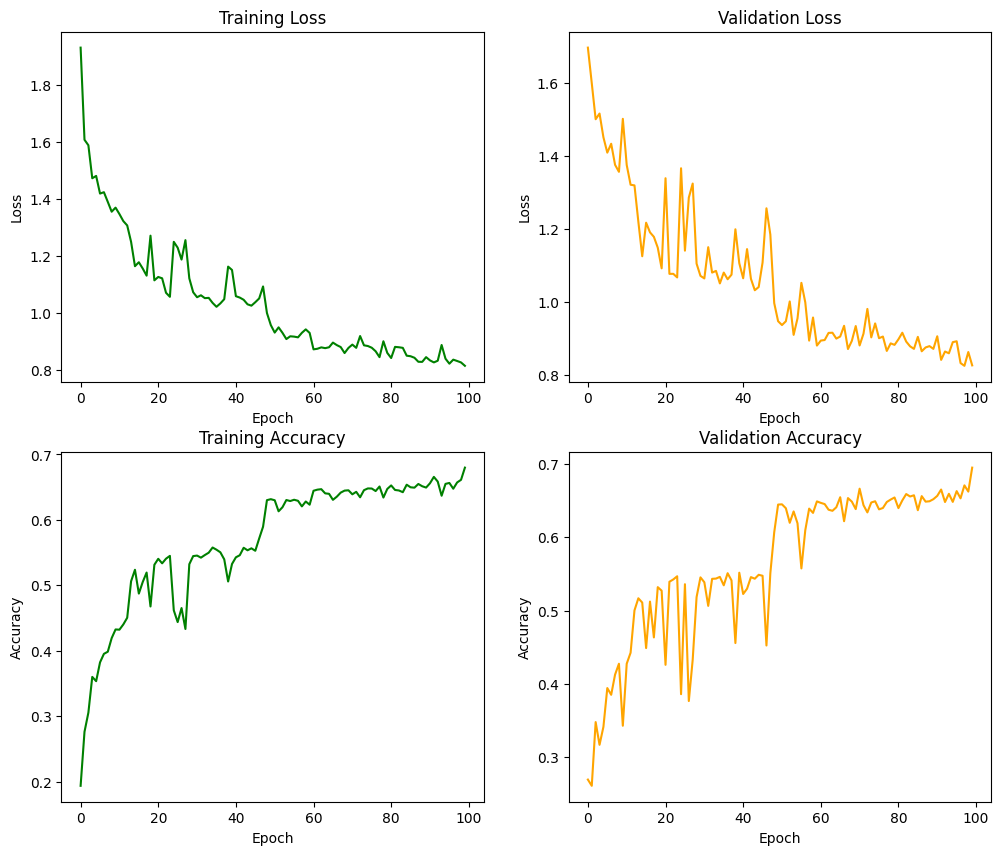

In [63]:
fig, ax = plt.subplots(2, 2, figsize = (12, 10))
ax[0,0].plot(train_loss_lst, color = 'green')
ax[0,0].set(xlabel='Epoch', ylabel='Loss')
ax[0,0].set_title('Training Loss')

ax[0,1].plot(val_loss_lst, color='orange')
ax[0,1].set(xlabel='Epoch', ylabel='Loss')
ax[0,1].set_title('Validation Loss')

ax[1,0].plot(train_acc_lst, color='green')
ax[1,0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1,0].set_title('Training Accuracy')

ax[1,1].plot(val_acc_lst, color='orange')
ax[1,1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1,1].set_title('Validation Accuracy')

plt.show()

In [64]:
test_target = []
test_predict = []
model.eval()
with torch.no_grad():
    for X_test, y_test in test_loader:
        X_test = X_test.to(device)
        y_test = y_test.to(device)
        outputs = model(X_test)
        
        test_predict.append(outputs.cpu())
        test_target.append(y_test.cpu())
    
    test_predict = torch.cat(test_predict)
    test_target = torch.cat(test_target)
    test_acc = (torch.argmax(test_predict, 1) == test_target).sum().item() / len(test_target)
    
    print('Evaluation on test set:')
    print(f'Accuracy: {test_acc}')

Evaluation on test set:
Accuracy: 0.687
